In [1]:
import numpy, pandas 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn import metrics

import seaborn as sns

df = pandas.read_csv('driver-data.csv')

df.head()


,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [2]:
kmeans = KMeans(n_clusters=4)

kmeans.fit(df)

print("Cluster's Center\n")
print(kmeans.cluster_centers_)

Cluster's Center

[[3.42331193e+09 7.78924373e+01 1.10050150e+01]
 [3.42331394e+09 7.51256677e+01 1.09436202e+01]
 [3.42331094e+09 7.74728832e+01 1.01532995e+01]
 [3.42331293e+09 7.37283913e+01 1.07715988e+01]]


In [3]:
unique, counts = numpy.unique(kmeans.labels_, return_counts=True)

dict_data = dict(zip(unique, counts))

print("Count of each cluster")

print(dict_data)

Count of each cluster
{0: 996, 1: 1010, 2: 988, 3: 1006}


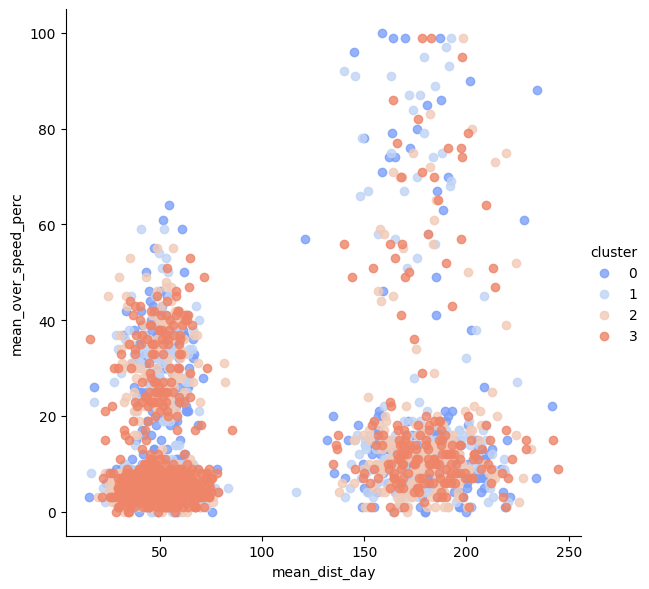

In [6]:
# Plot the clusters

df["cluster"] = kmeans.labels_

sns.lmplot(x='mean_dist_day', y='mean_over_speed_perc', data=df,hue='cluster', palette='coolwarm', height=6, aspect=1, fit_reg=False)

In [7]:
# Inertia is the sum of squared error for each cluster.
# Therefore the smaller the inertia the denser the cluster(closer together all the points are)

print("Inertia\n")

print(kmeans.inertia_)


Inertia

345591185.8228551


In [8]:
# Print the data

print("Data with clusters\n")

print(df)

Data with clusters

              id  mean_dist_day  mean_over_speed_perc  cluster
0     3423311935          71.24                    28        0
1     3423313212          52.53                    25        3
2     3423313724          64.54                    27        1
3     3423311373          55.69                    22        2
4     3423310999          54.58                    25        2
...          ...            ...                   ...      ...
3995  3423310685         160.04                    10        2
3996  3423312600         176.17                     5        3
3997  3423312921         170.91                    12        3
3998  3423313630         176.14                     5        1
3999  3423311533         168.03                     9        0

[4000 rows x 4 columns]
